# Módulo 4 - Aprendizado supervisionado

Neste notebook, implementaremos algoritmos de aprendizado supervisionado. Na primeira parte, veremos a implementação de árvores de decisão. Na segunda parte, veremos a random forests. Para isto, utilizaremos a biblioteca [scikit-learn](http://scikit-learn.org) do Python. Em ambos os casos, o objetivo é entender como estes algoritmos funcionam. Ao final, você deverá realizar os exercícios propostos.

## Parte 1 - Árvores de decisão

Primeiramente, precisamos importar algumas bibliotecas.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

Feito isto, agora iremos importar um dataset clássico da literatura, o [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). Felizmente, este dataset já está incluído na biblioteca scikit-learn. Desta forma, basta executar o comando abaixo para importá-lo.

In [2]:
iris = load_iris()

O dataset acima possui diversas instâncias de exemplo. Nosso objetivo é utilizar aprendizado supervisionado para aprender a distinguir espécies de iris com base na largura e comprimento de suas sépalas e pétalas. Para isto, precisamos separar as colunas representando as features de entrada (variável `X` abaixo) das classes de saída (variável `y` abaixo).

In [3]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

Para entender melhor os dados de entrada, podemos listar os primeiros 10 registros como segue.

In [4]:
X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Da mesma forma, podemos verificar os dados de saída como segue.

In [5]:
y

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

Com base na saída acima, note que temos 150 amostras de iris. Podemos ver também que as amostras de iris pertencem às espécies iris setosa, iris versicolor e iris virginica.

Agora, precisamos converter os dados de saída para um formato [categórico](https://pt.wikipedia.org/wiki/Variável_categórica). Isto vai facilitar o processo de aprendizagem. Para isto, podemos executar o comando abaixo.

In [6]:
y = pd.get_dummies(y)
y

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


Com os comandos acima, agora temos um conjunto de exemplos de entrada (`X`) e saída (`y`). No entanto, lembre-se que, para poder validar os modelos aprendidos, é preciso não apenas treiná-los, mas também testá-los. Para isto, podemos dividir aleatoriamente o conjunto de dados em conjunto de treino e de teste como segue.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Até aqui, nosso objetivo foi processar os dados. Agora podemos nos preocupar com os algoritmos em si.

O código abaixo cria uma instância do algoritmo [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) para a tarefa de classificação. Em sua chamada padrão, o algoritmo utiliza o índice Gini para escolher as features.

In [8]:
dt = DecisionTreeClassifier()

Criado o algoritmo, agora podemos finalmente treinar o modelo. Para isto, basta chamar a função `fit`, que recebe um conjunto de dados de treino (separados em entradas e saídas) e encontra a melhor árvore de decisão para representar estes dados.

In [9]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Após treinar o algoritmo, podemos analisar os resultados. Primeiramente, vamos visualizar a árvore resultante.

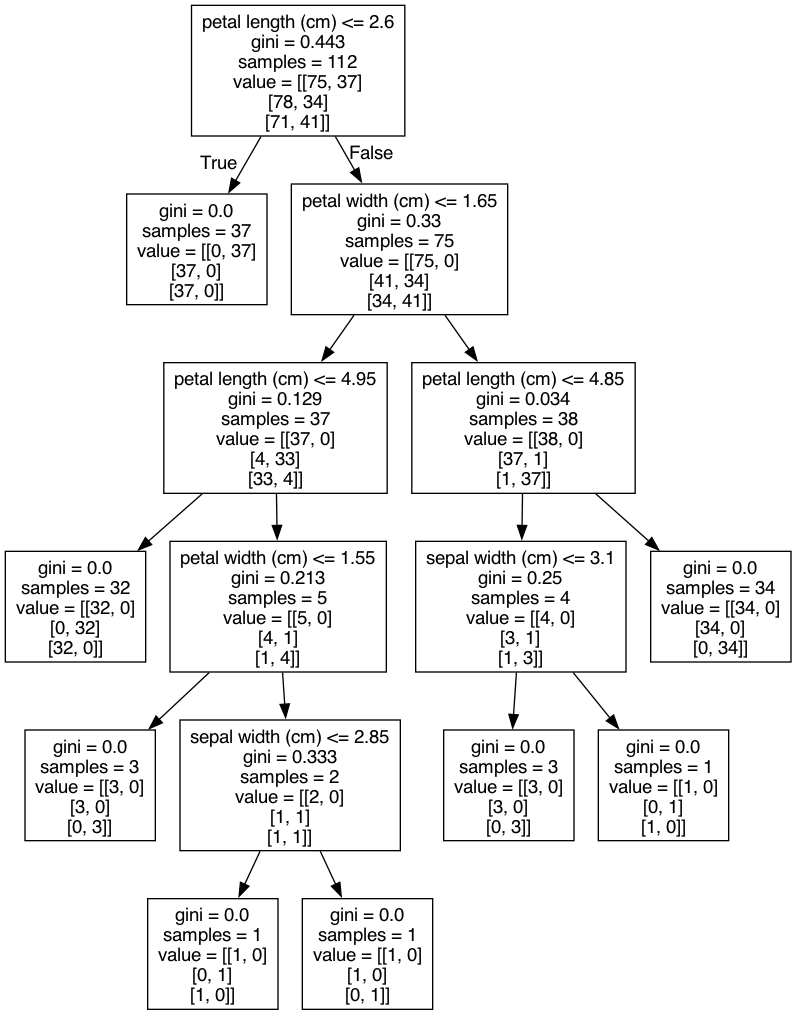

In [11]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Para avaliar nosso algoritmo, podemos verificar o quão bem ele se sai na classificação de dados novos. Para isto, podemos utilizar os dados de teste. 

Em particular, a função `predict` recebe um conjunto de dados de entrada (`X_test`) e retorna a classificação obtida através do algoritmo.

In [12]:
y_pred = dt.predict(X_test)

Para medir o desempenho do nosso método, podemos calcular algumas métricas como acurácia, precisão e recall.

In [13]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='micro')
r = recall_score(y_test, y_pred, average='micro')

print('Accuracy:\t%f' % a)
print('Precision:\t%f' % p)
print('Recall: \t%f' % r)

Accuracy:	0.973684
Precision:	0.973684
Recall: 	0.973684


Os resultados acima mostram que o algoritmo obteve um bom desempenho. De fato, ao gerar a matriz de confusão abaixo, podemos observar que os apenas uma instância foi classificada incorretamente.

In [14]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

### Exercício 1

Crie uma árvore de decisão para resolver um dos outros datasets de classificação disponíveis no scikit-learn. A lista de datasets pode ser encontrada [aqui](https://scikit-learn.org/stable/datasets/real_world.html). A tarefa consiste em importar os dados, treinar o algoritmo e avaliar os resultados.

In [27]:
# sua resposta aqui

# importando a biblioteca
from sklearn.datasets import load_wine

# importando o dataset
wines = load_wine()

# entrada
X = pd.DataFrame(wines.data, columns=wines.feature_names)
# saída
y = pd.Categorical.from_codes(wines.target, wines.target_names)

X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [28]:
# Verificando os dados de saída
y

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [29]:
# Transformando em formato categórico
y = pd.get_dummies(y)
y

,class_0,class_1,class_2
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
173,False,False,True
174,False,False,True
175,False,False,True
176,False,False,True


In [30]:
# Dividindo os dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Criando uma instância para o algoritmo Decision Tree
dt = DecisionTreeClassifier()

# Treinando o modelo
dt.fit(X_train, y_train)

DecisionTreeClassifier()

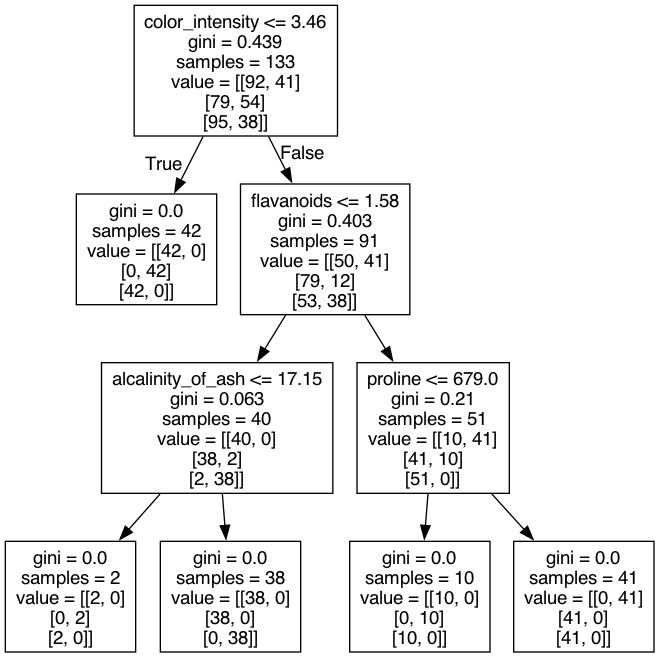

In [31]:
# Criando uma árvore de visualização
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=wines.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [32]:
# Testando a predição de dados novos
y_pred = dt.predict(X_test)

# métricas para medir o desempenho
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='micro')
r = recall_score(y_test, y_pred, average='micro')

print('Accuracy:\t%f' % a)
print('Precision:\t%f' % p)
print('Recall: \t%f' % r)

Accuracy:	0.955556
Precision:	0.955556
Recall: 	0.955556


In [33]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[18,  0,  0],
       [ 1, 15,  1],
       [ 0,  0, 10]])

## Parte 2 - Random forests

Nesta segunda parte do notebook, veremos como utilizar random forests.

Primeiramente, precisamos importar os dados e tratá-los novamente. Utilizaremos novamente o dataset de plantas iris. O código é basicamente o mesmo, então basta executar o trecho abaixo.

In [21]:
#@title Código-base de importação do dataset (basta executar)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn.metrics import accuracy_score, precision_score, recall_score

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Agora podemos criar uma instância de `RandomForestClassifier` ([documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). Esta instância cria um algoritmo random forest para a tarefa de classificação. No exemplo abaixo, utilizamos a entropia para escolher as features. 

In [22]:
rf = RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

Criado o algoritmo, agora podemos treiná-lo.

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

Agora, podemos visualizar uma das árvores de decisão resultantes.

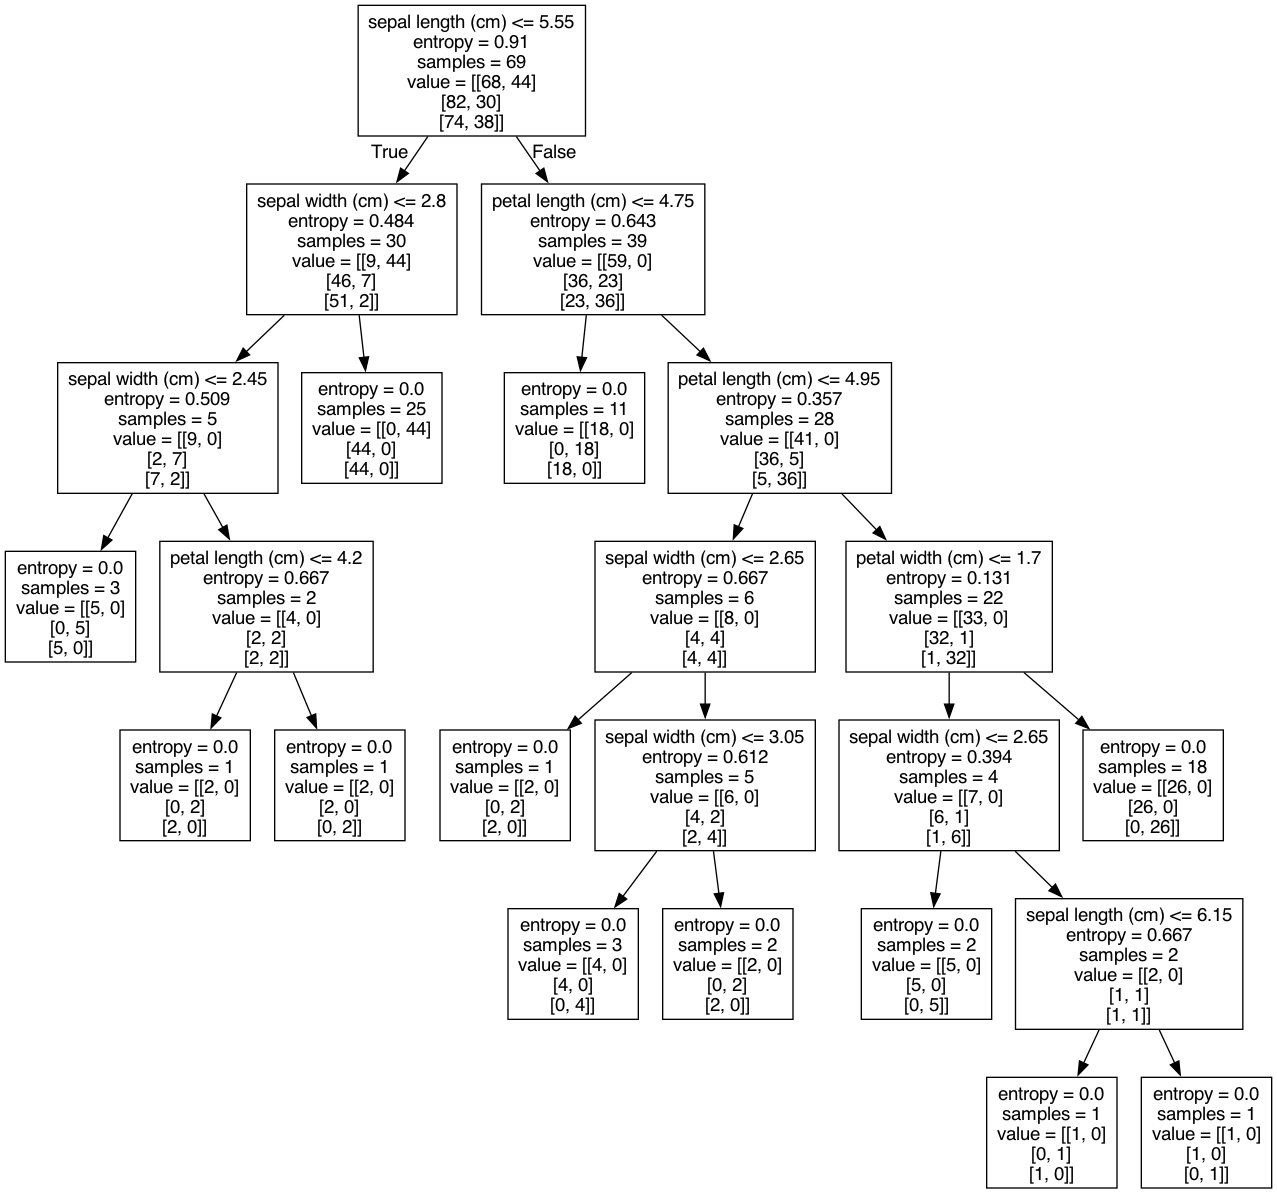

In [24]:
dt = rf.estimators_[0]
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Para analisar o desempenho do algoritmo, podemos calcular algumas métricas.

In [25]:
y_pred = rf.predict(X_test)
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='micro')
r = recall_score(y_test, y_pred, average='micro')

print('Accuracy:\t%f' % a)
print('Precision:\t%f' % p)
print('Recall: \t%f' % r)

Accuracy:	0.973684
Precision:	0.973684
Recall: 	0.973684


Além do mais, podemos analisar a matriz de confusão. Novamente, note que o resultado ficou bastante bom e que apenas uma instância foi classificada incorretamente.

In [26]:
classes = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(classes, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

### Exercício 2

Crie uma random forest para resolver um dos outros datasets de classificação disponíveis no scikit-learn. A lista de datasets pode ser encontrada [aqui](https://scikit-learn.org/stable/datasets/real_world.html). Utilize um dataset diferente do utilizado no exercício 1. A tarefa consiste em importar os dados, treinar o algoritmo e avaliar os resultados.

In [36]:
# sua resposta aqui
from sklearn.datasets import load_breast_cancer

# importando o dataset
breast = load_breast_cancer()

# entrada
X = pd.DataFrame(breast.data, columns=breast.feature_names)
# saída
y = pd.Categorical.from_codes(breast.target, breast.target_names)

y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

rf = RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

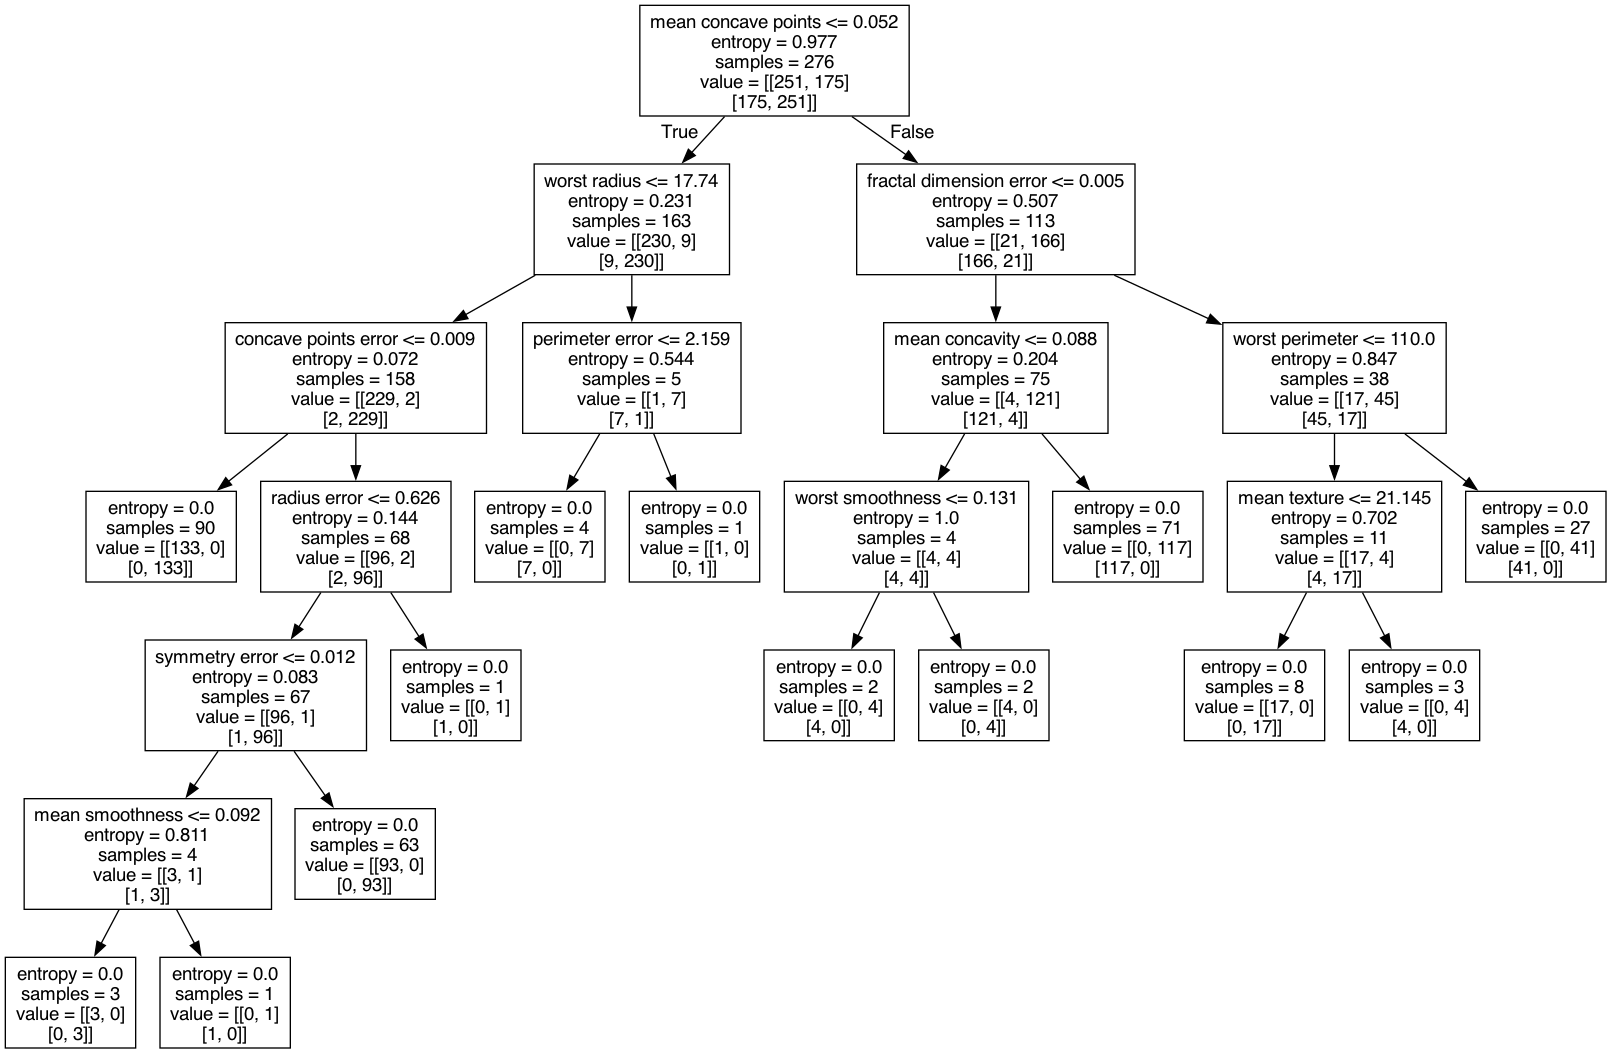

In [37]:
dt = rf.estimators_[0]
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=breast.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [38]:
y_pred = rf.predict(X_test)
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='micro')
r = recall_score(y_test, y_pred, average='micro')

print('Accuracy:\t%f' % a)
print('Precision:\t%f' % p)
print('Recall: \t%f' % r)

Accuracy:	0.958042
Precision:	0.958042
Recall: 	0.958042


In [39]:
classes = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(classes, predictions)

array([[51,  4],
       [ 2, 86]])